In [ ]:
# !pip install kagglehub
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ryanholbrook/car-or-truck")
print("Path to dataset files:", path)

d:\personal\dl_BC\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 77.7M/77.7M [00:58<00:00, 1.39MB/s]

Extracting files...


Path to dataset files: C:\Users\asif\.cache\kagglehub\datasets\ryanholbrook\car-or-truck\versions\1


### Build the Neural Network Model

    - You can use a Convolutional Neural Network (CNN) for image classification.


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = 128
batch_size = 32

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = train_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\valid',  # Replace with your test dataset folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)


Found 4350 images belonging to 2 classes.
Found 767 images belonging to 2 classes.
Found 5051 images belonging to 2 classes.
Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.5639 - loss: 0.9935 - val_accuracy: 0.6495 - val_loss: 0.6380
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 0.7450 - val_accuracy: 0.6481 - val_loss: 0.6416
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6741 - loss: 0.6008 - val_accuracy: 0.7269 - val_loss: 0.5549
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.5472 - val_accuracy: 0.7323 - val_loss: 0.5498
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7634 - loss: 0.4888 - val_accuracy: 0.7201 - val_loss: 0.5368
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.3771 - val_accuracy: 0.7147 - val_loss: 0.5370
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.8385 - loss: 0.3741 - val_accuracy: 0

In [23]:
# Save the model (optional)
model.save('car_vs_truck_classifier.h5')

158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7736 - loss: 0.7268
Test Accuracy: 0.76


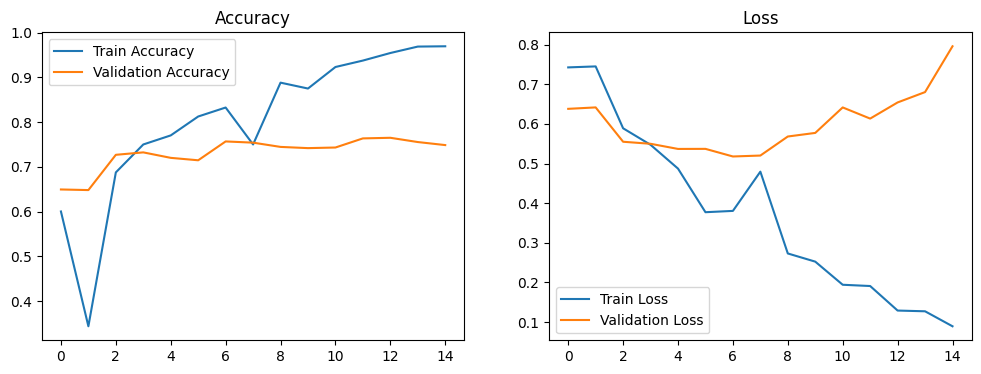

In [24]:

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot Training and Validation Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


### Evaluate the Model

- Use the test dataset for evaluation.
- Check for overfitting/underfitting by analyzing training and validation accuracy/loss curves.

### Compare with Pre-Trained Model

- Use a pre-trained model like MobileNetV2 or ResNet50 via transfer learning.

Found 4350 images belonging to 2 classes.
Found 757 images belonging to 2 classes.
Found 5051 images belonging to 2 classes.
Epoch 1/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.6848 - loss: 1.2672 - val_accuracy: 0.8084 - val_loss: 0.4042
Epoch 2/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7500 - loss: 0.5515 - val_accuracy: 0.8207 - val_loss: 0.4045
Epoch 3/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8001 - loss: 0.4496 - val_accuracy: 0.8478 - val_loss: 0.3590
Epoch 4/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9062 - loss: 0.2728 - val_accuracy: 0.8370 - val_loss: 0.3575
Epoch 5/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8140 - loss: 0.4153 - val_accuracy: 0.8370 - val_loss: 0.3755
Epoch 6/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7500 - loss: 0.3764 - val_accuracy: 0.8438 - val_loss: 0.3867
Epoch 7/15
135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.8068 - loss: 0.4058 - val_acc

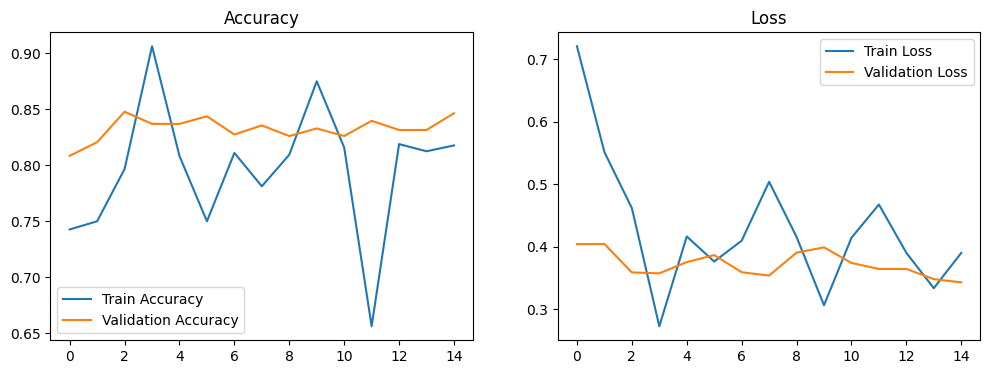

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Parameters
img_size = 128  # Image size (height x width)
batch_size = 32  # Batch size
epochs = 15  # Number of epochs

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.15,  # Split training/validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\train',  # Replace with your dataset folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\valid',  # Replace with your dataset folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load Test Data
test_generator = test_datagen.flow_from_directory(
    'D:\\personal\\dl_BC\\dataset\\valid',  # Replace with your test dataset folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Load Pre-Trained Model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,  # Exclude the default fully connected layers
    weights='imagenet'  # Use pre-trained weights from ImageNet
)
base_model.trainable = False  # Freeze the base model

# Build the Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot Training and Validation Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
